In [1]:
import os
import numpy as np
from scipy import stats
import pandas as pd
import arviz as az 
pd.options.mode.chained_assignment = None
import math
from scipy.stats import norm
import xarray
import matplotlib.pyplot as plt

In [2]:
#this function is for transforming the plots into the right parameter space
#(for parameters that got phi_approx in the model code)
def transform1(dataset):
    variable = norm.pdf(dataset.mu_pr.values)
    dataset.mu_pr.values = variable
    return dataset

In [3]:
os.chdir("C:\\Users\\dexte\\sparklyRGT\\Pystan\\nc_files")

In [86]:
loss_basic_fit = az.from_netcdf('loss_basic_fit.nc')
outcome_basic_fit = az.from_netcdf('outcome_basic_fit.nc')
random_basic_fit = az.from_netcdf('random_basic_fit.nc')
reverse_basic_fit = az.from_netcdf('reverse_basic_fit.nc')
standard_basic_fit = az.from_netcdf('standard_basic_fit.nc')
uncued_basic_fit = az.from_netcdf('uncued_basic_fit.nc')

loss_basicstar_fit = az.from_netcdf('loss_basic-star_fit.nc')
outcome_basicstar_fit = az.from_netcdf('outcome_basic-star_fit.nc')
random_basicstar_fit = az.from_netcdf('random_basic-star_fit.nc')
reverse_basicstar_fit = az.from_netcdf('reverse_basic-star_fit.nc')
standard_basicstar_fit = az.from_netcdf('standard_basic-star_fit.nc')
uncued_basicstar_fit = az.from_netcdf('uncued_basic-star_fit.nc')

loss_pscale_fit = az.from_netcdf('loss_pscale_fit.nc')
outcome_pscale_fit = az.from_netcdf('outcome_pscale_fit.nc')
random_pscale_fit = az.from_netcdf('random_pscale_fit.nc')
# reverse_pscale_fit = az.from_netcdf('reverse_pscale_fit.nc')
standard_pscale_fit = az.from_netcdf('standard_pscale_fit.nc')
uncued_pscale_fit = az.from_netcdf('uncued_pscale_fit.nc')

loss_pscalestar_fit = az.from_netcdf('loss_pscale-star_fit.nc')
outcome_pscalestar_fit = az.from_netcdf('outcome_pscale-star_fit.nc')
random_pscalestar_fit = az.from_netcdf('random_pscale-star_fit.nc')
reverse_pscalestar_fit = az.from_netcdf('reverse_pscale-star_fit.nc')
standard_pscalestar_fit = az.from_netcdf('standard_pscale-star_fit.nc')
uncued_pscalestar_fit = az.from_netcdf('uncued_pscale-star_fit.nc')

array([[<AxesSubplot:title={'center':'mu_pr'}>,
        <AxesSubplot:title={'center':'mu_pr'}>]], dtype=object)

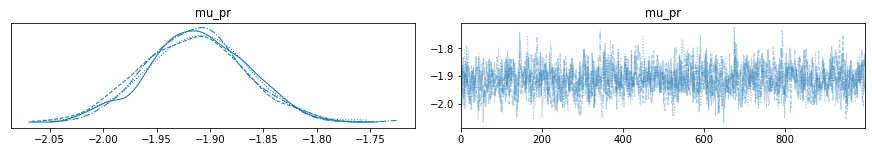

In [5]:
#extract posterior distribution for each group level parameter and plot them

#figures on left = posterior distribution for each of the chains --> should all overlap
#figures on right = trace plot for all four chains
#trace plot is a graph of the sampled parameter values as a function of the step in the chain 

az.plot_trace(standard_basic_fit.posterior.mu_pr, coords = {'mu_pr_dim_0':[0]})
# az.plot_trace(uncued_basic_fit.posterior.mu_pr, coords = {'mu_pr_dim_0':[0]})

In [6]:
standard_basic_fit.posterior.mu_pr

<xarray.DataArray 'mu_pr' (chain: 4, draw: 1000, mu_pr_dim_0: 4)>
array([[[-1.918307, -2.071541, -1.809071,  0.023597],
        [-1.864454, -2.107177, -1.863133,  0.011657],
        ...,
        [-1.933393, -2.109392, -2.220253,  0.03611 ],
        [-1.916395, -2.128687, -2.255706,  0.038109]],

       [[-1.936327, -1.952029, -2.010926,  0.026517],
        [-1.918814, -2.020761, -2.018589,  0.025329],
        ...,
        [-1.824135, -2.154035, -2.192191,  0.020833],
        [-1.797483, -2.140843, -2.140497,  0.025619]],

       [[-1.896075, -1.925061, -1.717491,  0.021297],
        [-1.859918, -2.118187, -1.608683,  0.011259],
        ...,
        [-1.869218, -1.998229, -1.940088,  0.022143],
        [-1.867111, -2.000432, -1.913818,  0.021662]],

       [[-1.938204, -2.028607, -1.898259,  0.019374],
        [-1.924736, -2.004017, -1.780771,  0.025918],
        ...,
        [-1.922988, -2.033469, -1.932625,  0.022212],
        [-1.922638, -2.103712, -1.940575,  0.017769]]])
Coordinates:
  * chain        (chain) int64 0 1 2 3
  * draw         (draw) int64 0 1 2 3 4 5 6 7 ... 993 994 995 996 997 998 999
  * mu_pr_dim_0  (mu_pr_dim_0) int64 0 1 2 3

In [11]:
df_loss = loss_pindep_fit.posterior.mu_pr.to_dataframe()
df_loss
# df_loss.head(8)
#beta, etaP, etaN, p1, p2, p3, p4

mu_pr
chain draw mu_pr_dim_0          
0     0    0           -2.018852
           1           -1.844333
           2           -0.114212
           3           -0.256192
           4           -0.083690
...                          ...
3     999  2           -0.571341
           3           -0.189007
           4           -0.077698
           5            0.003640
           6            0.015849

[28000 rows x 1 columns]

In [16]:
beta_4_chains = df_loss[df_loss.index.get_level_values("mu_pr_dim_0").isin([0])]
beta_4_chains

mu_pr
chain draw mu_pr_dim_0          
0     0    0           -2.018852
      1    0           -1.963311
      2    0           -1.966379
      3    0           -2.034624
      4    0           -2.028655
...                          ...
3     995  0           -1.914717
      996  0           -1.949643
      997  0           -1.973649
      998  0           -1.978695
      999  0           -1.955816

[4000 rows x 1 columns]

<AxesSubplot:title={'center':'mu_pr'}>

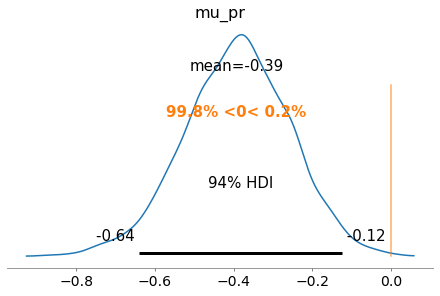

In [34]:
sb_beta = standard_basic_fit.posterior.mu_pr[:,:,0] #four chains, all 1000 draws, for the first group parameter (beta)
ub_beta = uncued_basic_fit.posterior.mu_pr[:,:,0]
means_diff = sb_beta - ub_beta
# means_diff
az.plot_posterior(means_diff, ref_val = 0)

In [47]:
sb_sigma = standard_basic_fit.posterior.sigma[:,:,0]
ub_sigma = uncued_basic_fit.posterior.sigma[:,:,0]

In [ ]:
chain_1 = sb_fit_mu['mu_pr'][0]
chain_1 #the first chain, with 1000 draws
chain_1[:,0] #the first column of the first chain, representing mu_pr_0\

chain_2 = sb_fit_mu['mu_pr'][1]
chain_2
chain_2[:,0] #all the rows of the first column 

ub_chain_1 = ub_fit_mu['mu_pr'][0]
ub_chain_1 
ub_chain_1[:,0]

# dataset = pd.DataFrame({'mu_pr_0': chain_1[:, 0], 'mu_pr_1': chain_1[:, 1],'mu_pr_2': chain_1[:, 2],'mu_pr_3': chain_1[:, 3]})
# dataset

means_diff = chain_1[:,0] - ub_chain_1[:,0]
means_diff
az.plot_posterior(means_diff, ref_val=0)

In [ ]:
sb_fit_mu['sigma'][0] #1st sigma chain
sb_fit_mu['sigma'][0][:,0] #all rows in the first column of the chain

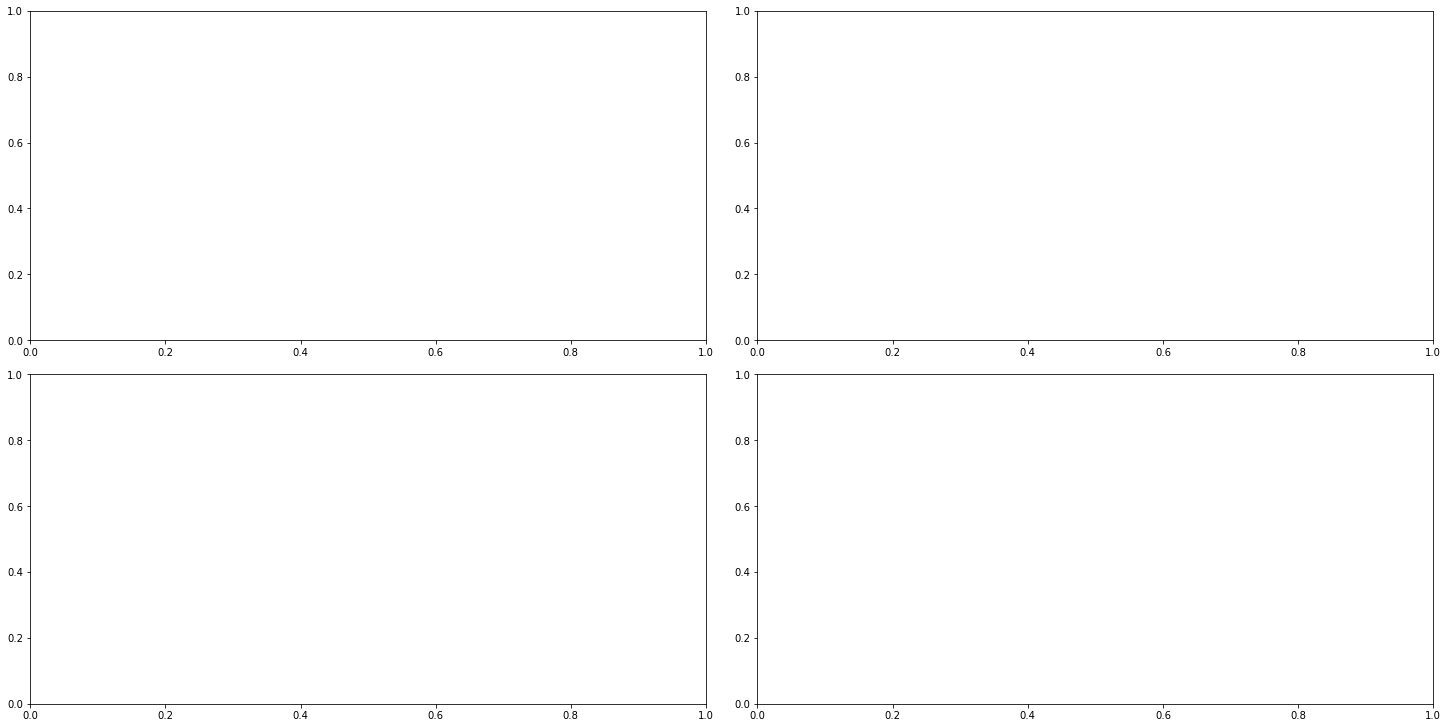

In [41]:
dist = stats.norm()

_, ax = plt.subplots(2, 2, figsize=(20, 10), constrained_layout=True)

comparisons = [(i, j) for i in range(4) for j in range(4) if j == i] #[(0, 0), (1, 1), (2, 2), (3, 3)]
pos = [(k, l) for k in range(2) for l in range(2)] #[(0, 0), (0, 1), (1, 0), (1, 1)]

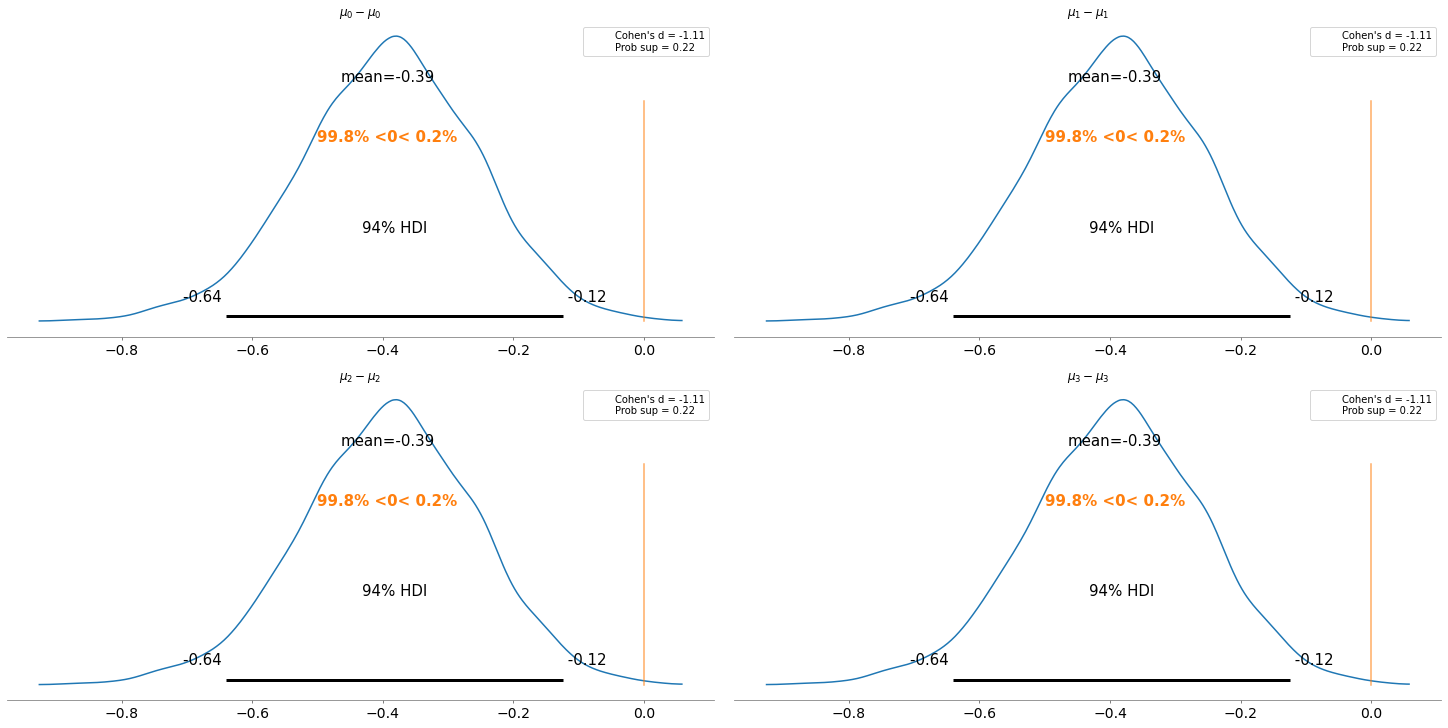

In [48]:
dist = stats.norm()

_, ax = plt.subplots(2, 2, figsize=(20, 10), constrained_layout=True)

comparisons = [(i, j) for i in range(4) for j in range(4) if j == i]
pos = [(k, l) for k in range(2) for l in range(2)]

for (i, j), (k, l) in zip(comparisons, pos):
    means_diff = sb_beta - ub_beta #means_diff holds the sample difference distribution values
    d_cohen = (means_diff / np.sqrt((sb_sigma**2 + ub_sigma**2) / 2)).mean() #d_cohen is an xarray.DataArray
    ps = dist.cdf(d_cohen/(2**0.5))
    az.plot_posterior(means_diff, ref_val=0, ax=ax[k, l]) #plots posteriors in 2D array of locations 
    #for example, mu_0 - mu_0 will be in the 0,0 box (top left)
    ax[k, l].set_title(f'$\mu_{i}-\mu_{j}$')
    ax[k, l].plot(
        0, label=f"Cohen's d = {d_cohen.values:.2f}\nProb sup = {ps:.2f}", alpha=0)
    ax[k, l].legend();

In [115]:
import math
def round_up(n):
    if n - math.floor(n) < 0.5:
        return math.floor(n)
    return math.ceil(n)

In [147]:
pos = [(k, l) for k in range(round_up(5/2)) for l in range(2)]
del pos[-1]
pos

[(0, 0), (0, 1), (1, 0), (1, 1), (2, 0)]

In [172]:
def sample_diff(num_params, fit1, fit2):
    """Takes in num_params (ex. basic = 4), fit1 and fit2 (4 chains) and outputs the sample difference distribution (fit1 - fit2) for the group parameters
    Also outputs Cohen's d, probability of superiority (Prob Sup)... and the distribution's mean, 94% HDI, and probability density to the left and right of 0
    If the 94% HDI does not contain 0, then the parameters are credibly different"""
    
    #variables
    dist = stats.norm()
    _, ax = plt.subplots(round_up(num_params/2), 2, figsize=(20, 10), constrained_layout=True)
    comparisons = [(j) for j in range(num_params)]
    pos = [(k, l) for k in range(round_up(num_params/2)) for l in range(2)]
    #comparisons
    for (j), (k, l) in zip(comparisons, pos):
        print(k,l)
        means_diff = fit1.posterior.mu_pr[:,:,j] - fit2.posterior.mu_pr[:,:,j] #means_diff holds the distribution of the sample difference 
        d_cohen = (means_diff / np.sqrt((fit1.posterior.sigma[:,:,j]**2 + fit2.posterior.sigma[:,:,j]**2) / 2)).mean() 
        ps = dist.cdf(d_cohen/(2**0.5))
        az.plot_posterior(means_diff, ref_val=0, ax=ax[k, l]) #plots posteriors in 2D array of locations: for example, mu_0 - mu_0 will be in the 0,0 box (top left)
        ax[k, l].set_title(f'$\mu_{j}-\mu_{j}$')
        ax[k, l].plot(0, label=f"Cohen's d = {d_cohen.values:.2f}\nProb sup = {ps:.2f}", alpha=0)
        ax[k, l].legend();

0 0
0 1
1 0
1 1
2 0


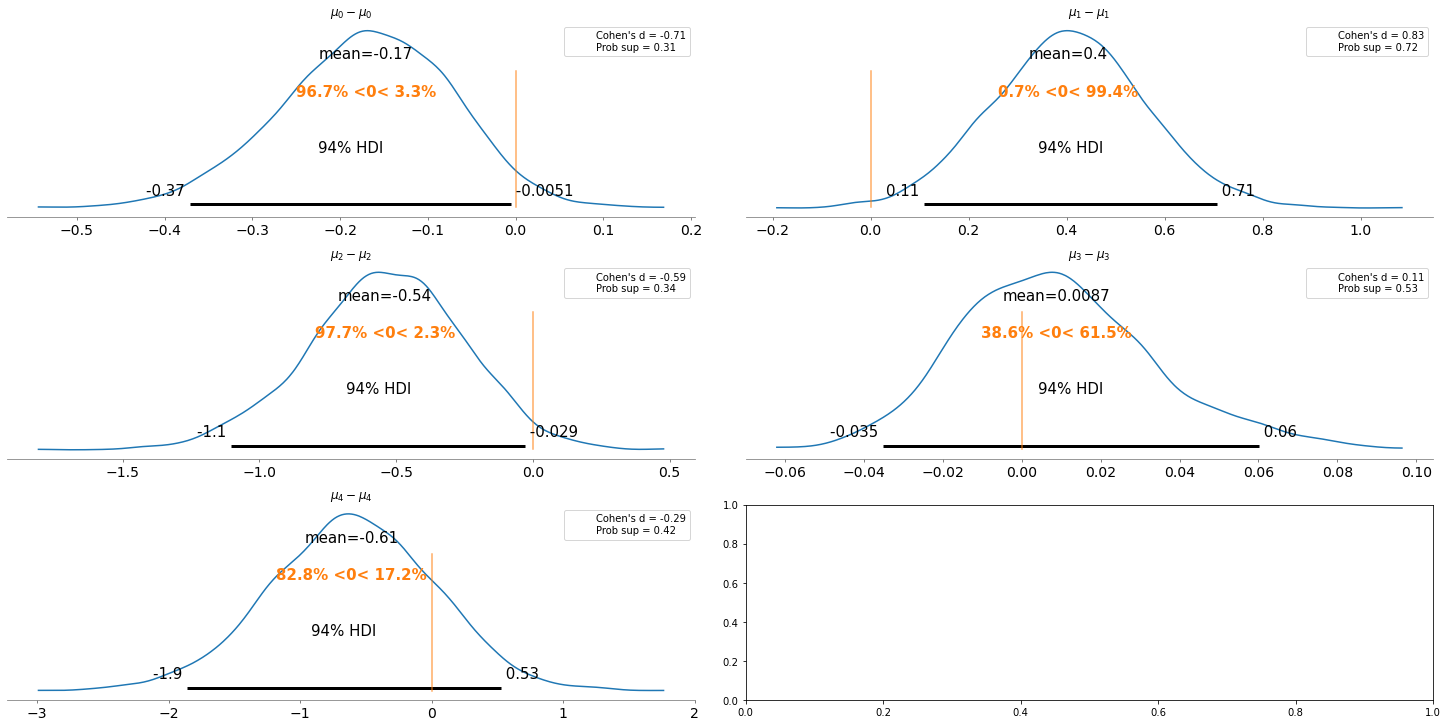

In [173]:
sample_diff(5, standard_pscale_fit, uncued_pscale_fit)

In [97]:
standard_basicstar_fit.posterior.mu_pr
# uncued_basicstar_fit.posterior.mu_pr

<xarray.DataArray 'mu_pr' (chain: 4, draw: 1000, mu_pr_dim_0: 3)>
array([[[-1.9843  , -2.0046  ,  0.02852 ],
        [-1.913252, -2.041029,  0.03019 ],
        ...,
        [-1.946867, -2.117558,  0.013365],
        [-1.9794  , -2.035151,  0.007291]],

       [[-1.828275, -2.087913,  0.019292],
        [-1.834265, -2.086481,  0.015213],
        ...,
        [-1.927445, -2.109637,  0.020928],
        [-1.896538, -2.110989,  0.020894]],

       [[-1.906936, -2.045803,  0.024642],
        [-1.951126, -2.048902,  0.028631],
        ...,
        [-1.979567, -2.020789,  0.019017],
        [-1.945512, -2.046991,  0.025555]],

       [[-1.926465, -1.954803,  0.026641],
        [-2.00565 , -2.107064,  0.02744 ],
        ...,
        [-1.910554, -1.973756,  0.020015],
        [-1.972684, -1.922295,  0.024687]]])
Coordinates:
  * chain        (chain) int64 0 1 2 3
  * draw         (draw) int64 0 1 2 3 4 5 6 7 ... 993 994 995 996 997 998 999
  * mu_pr_dim_0  (mu_pr_dim_0) int64 0 1 2

In [ ]:
    #param
    for p in list(range(num_params)):
        if p == 0: 
            param_0_diff = fit1.posterior.mu_pr[:,:,0] - fit2.posterior.mu_pr[:,:,0] #always beta
        elif p == 1:
            param_1_diff = fit1.posterior.mu_pr[:,:,1] - fit2.posterior.mu_pr[:,:,1] #always etaP or eta
        elif p == 2:
            param_2_diff = fit1.posterior.mu_pr[:,:,2] - fit2.posterior.mu_pr[:,:,2] 
        elif p == 3:
            param_3_diff = fit1.posterior.mu_pr[:,:,3] - fit2.posterior.mu_pr[:,:,3]
        elif p == 4:
            param_4_diff = fit1.posterior.mu_pr[:,:,4] - fit2.posterior.mu_pr[:,:,4]
        elif p == 5:
            param_5_diff = fit1.posterior.mu_pr[:,:,5] - fit2.posterior.mu_pr[:,:,5]
        elif p == 6:
            param_6_diff = fit1.posterior.mu_pr[:,:,6] - fit2.posterior.mu_pr[:,:,6]

In [62]:
def if_test(num_params): 
    for p in list(range(num_params)):
        if p == 0: 
            print("0")
        elif p == 1: 
            print("1")
        elif p == 2: 
            print("2")
        elif p == 3: 
            print("3")
        elif p == 4: 
            print("4")
        elif p == 5: 
            print("5")
        elif p == 6: 
            print("6")

In [64]:
if_test(9)

0
1
2
3
4
5
6


In [83]:
def sample_diff(fit1, fit2):
    """Takes in fit1 and fit2 and outputs the sample difference distribution (fit1 - fit2) for the group parameters
    Also outputs Cohen's d, probability of superiority (Prob Sup)... and the distribution's mean, 94% HDI, and probability density to the left and right of 0"""
    
    #variables
    dist = stats.norm()
    _, ax = plt.subplots(2, 2, figsize=(20, 10), constrained_layout=True)
    comparisons = [(i, j) for i in range(4) for j in range(4) if j == i]
    pos = [(k, l) for k in range(2) for l in range(2)]
    
    #objects 
    

    #comparisons
    for (i, j), (k, l) in zip(comparisons, pos):
        means_diff = fit1.posterior['mu_pr'][0][:, i] - fit2.posterior['mu_pr'][0][:, j] #means_diff holds the sample difference distribution values
        d_cohen = (means_diff / np.sqrt((fit1.posterior['sigma'][0][:, i]**2 + fit2.posterior['sigma'][0][:, j]**2) / 2)).mean() #d_cohen is an xarray.DataArray
        ps = dist.cdf(d_cohen/(2**0.5))
        az.plot_posterior(means_diff, ref_val=0, ax=ax[k, l]) #plots posteriors in 2D array of locations: for example, mu_0 - mu_0 will be in the 0,0 box (top left)
        ax[k, l].set_title(f'$\mu_{i}-\mu_{j}$')
        ax[k, l].plot(0, label=f"Cohen's d = {d_cohen.values:.2f}\nProb sup = {ps:.2f}", alpha=0)
        ax[k, l].legend();

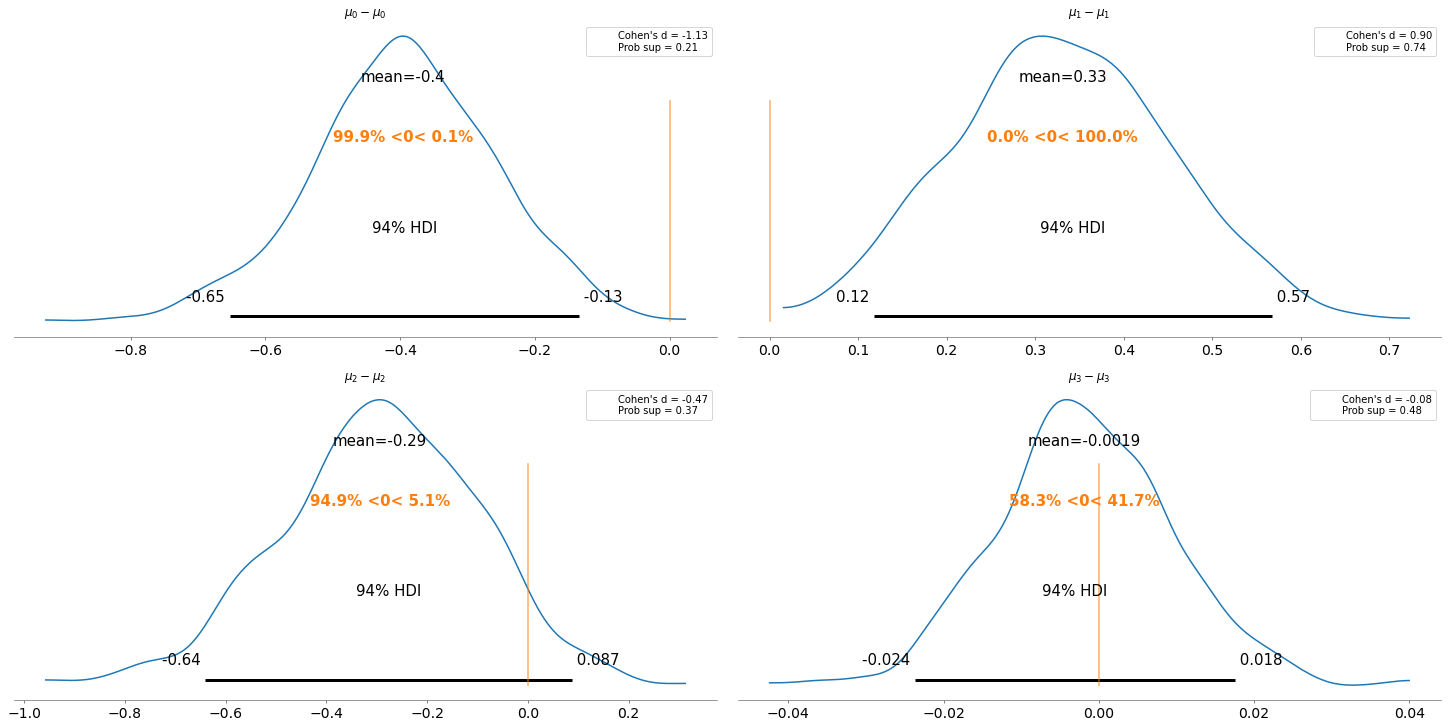

In [84]:
sample_diff(standard_basic_fit, uncued_basic_fit)

In [ ]:
#print summary statistics 
#xarray.set_options(display_max_rows=264)
summary_fit = az.summary(standard_basic_fit)
pd.set_option('display.max_rows', summary_fit.shape[0]+1)
# print(summary_fit) #prints all rows 

In [ ]:
# can convert to pandas dataframe (made no changes, runs fine) 
standard_basic_df = standard_basic_fit.to_dataframe()
# standard_basic_df.keys()
# standard_basic_df

In [ ]:
_, ax = plt.subplots(2, 2, figsize=(20, 10), constrained_layout=True)

params = ['Beta', 'Eta Positive', 'Eta Negative', 'm']
pos = [(k, l) for k in range(2) for l in range(2)]
comparisons = [(i, j) for i in range(4) for j in range(4) if j == i]
param = [m for m in range(len(params))]

for (k,l), (i,j), (m) in zip(pos, comparisons, param):
    az.plot_density([standard_basic_fit.posterior['mu_pr'][0][:, i],uncued_basic_fit.posterior['mu_pr'][0][:, j]], var_names = 'mu_pr', 
            data_labels = ['Standard cued', 'Uncued'],
            shade = 0.1, 
            hdi_prob = 0.95,
            ax = ax[k,l])
    ax[k,l].set_title(params[m], fontsize = 'xx-large')